# Kmeans

El archivo Kmeans.ipynb contiene un cuaderno de Jupyter que implementa un proceso de análisis de datos utilizando el algoritmo de clustering K-Means. El código está diseñado para realizar un análisis exploratorio y de agrupamiento sobre un conjunto de datos almacenado en el archivo ordenes_cluster_1.csv. A continuación, se describe brevemente lo que realiza el código:

**Carga de Datos:**
 
 El código comienza importando las bibliotecas necesarias, como pandas, numpy, matplotlib, seaborn, y scikit-learn, para el manejo de datos, visualización y aprendizaje automático. Luego, carga el archivo CSV ordenes_cluster_1.csv en un DataFrame de pandas, creando una copia para trabajar con los datos.

**Preprocesamiento:** 

Se seleccionan y excluyen ciertas columnas del conjunto de datos que no son relevantes para el análisis de clustering, como identificadores (order_id, user_id, vendor_id) y otras variables específicas. Las variables numéricas seleccionadas (por ejemplo, total_amount, cant_prod_por_ped, cant_ordenes_vendor, entre otras) se escalan utilizando StandardScaler para estandarizar los datos, asegurando que todas las características tengan la misma escala y sean comparables.

**Preparación para Clustering:** 

Las columnas no escaladas (como variables categóricas o binarias) se combinan con las variables escaladas en un nuevo DataFrame, ordenes_df_cluster_scaled, que contiene los datos preprocesados listos para el análisis.

**Visualización:** 

El código genera gráficos de barras para un subconjunto de variables seleccionadas (como total_amount, cant_prod_por_ped, log_sum_pairwise_cooc, entre otras) utilizando la función bar_plots_N_var. Estos gráficos permiten explorar la distribución de las variables en el conjunto de datos.

En resumen, el código establece una base para realizar clustering con K-Means al preparar y escalar un conjunto de datos, excluyendo variables irrelevantes y visualizando las características clave. Aunque el archivo no muestra la ejecución completa del algoritmo K-Means, prepara el terreno para su aplicación posterior, asegurando que los datos estén limpios y normalizados para un análisis de agrupamiento efectivo.

In [77]:
# --- Importación de librerías estándar ---
import pandas as pd
import numpy as np
import string
import math

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display

# --- Machine Learning y procesamiento ---
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from sklearn.manifold import TSNE

# --- Estilo gráfico global ---
sns.set_style("whitegrid")  # Fondo de gráficos con cuadrícula clara

plt.rcParams.update({
    'axes.titlesize': 16,       # Tamaño del título del gráfico
    'axes.labelsize': 14,       # Tamaño de las etiquetas de los ejes
    'xtick.labelsize': 12,      # Tamaño de los valores en el eje X
    'ytick.labelsize': 12,      # Tamaño de los valores en el eje Y
    'legend.fontsize': 12,      # Tamaño de la fuente en la leyenda
    'figure.titlesize': 18      # Tamaño del título principal si se usa plt.suptitle
})

In [78]:
Flag = False  # Variable de control para la ejecución de celdas

## Carga de datos

In [79]:
ordenes_cluster = pd.read_csv('tabla_para_clusterizacion.csv')
ordenes_df_cluster = ordenes_cluster.copy()
ordenes_cluster.columns

Index(['order_id', 'weekday', 'hour', 'vendor_id', 'user_id', 'total_amount',
       'has_discount', 'cant_prod_por_ped', 'cant_ordenes_vendor',
       'cat1_por_vendor', 'cat2_por_vendor', 'mean_euc_dist', 'max_euc_dist',
       'min_euc_dist', 'mean_frec_global', 'std_frec_global', 'cant_ord_user',
       'identical_order_count', 'precio_prom_prod', 'log_precio_prom_prod',
       'cant_level_one_unicos', 'aux_has_discount', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'fin_de_semana_mañana',
       'fin_de_semana_mediodia', 'fin_de_semana_noche', 'fin_de_semana_tarde',
       'semana_mañana', 'semana_mediodia', 'semana_noche', 'semana_tarde',
       'week_sin', 'week_cos', 'log_sum_pairwise_cooc'],
      dtype='object')

## Preprocesamiento de datos

In [80]:
vars_a_excluir = ['order_id','user_id','vendor_id','weekday','has_discount','hour','cant_ord_user','precio_prom_prod','identical_order_count','aux_has_discount', 'fin_de_semana_mañana', 'fin_de_semana_mediodia',
       'fin_de_semana_noche', 'fin_de_semana_tarde', 'semana_mañana', 'semana_mediodia', 'semana_noche', 'semana_tarde']

ordenes_df_cluster.drop(columns=vars_a_excluir, inplace=True)
ordenes_df_cluster.columns

Index(['total_amount', 'cant_prod_por_ped', 'cant_ordenes_vendor',
       'cat1_por_vendor', 'cat2_por_vendor', 'mean_euc_dist', 'max_euc_dist',
       'min_euc_dist', 'mean_frec_global', 'std_frec_global',
       'log_precio_prom_prod', 'cant_level_one_unicos', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'week_sin',
       'week_cos', 'log_sum_pairwise_cooc'],
      dtype='object')

### Escalado de variables

Se aplica StandardScaler para estandarizar las variables numéricas seleccionadas en variables_a_escalar, transformándolas para que tengan media 0 y desviación estándar 1. Esto es esencial para algoritmos como K-Means y t-SNE, que son sensibles a la escala de los datos. El resultado se encapsula en un nuevo DataFrame llamado ordenes_df_cluster_scaled, listo para análisis y modelado subsecuente.

In [81]:
variables_a_escalar = [
    'total_amount', 'cant_prod_por_ped', 'cant_ordenes_vendor',
    'cat1_por_vendor', 'cat2_por_vendor', 'mean_euc_dist', 'max_euc_dist',
    'min_euc_dist', 'mean_frec_global', 'std_frec_global',
    'log_precio_prom_prod', 'cant_level_one_unicos',
    'log_sum_pairwise_cooc'
]

otras_vars = ordenes_df_cluster.drop(columns=variables_a_escalar)

scaler = StandardScaler()

# Ajustar el scaler y transformar los datos
df_scaled_array = scaler.fit_transform(ordenes_df_cluster[variables_a_escalar])

# Crear un nuevo DataFrame con los datos escalados
ordenes_df_cluster_scaled = pd.DataFrame(df_scaled_array, columns=variables_a_escalar)

# Concatenar las escaladas con las no escaladas
ordenes_df_cluster_scaled = pd.concat([otras_vars.reset_index(drop=True),
                                       pd.DataFrame(df_scaled_array, columns=variables_a_escalar)], axis=1)

## Metodo del codo

Se aplica el algoritmo de K-Means sobre el dataset previamente escalado (ordenes_df_cluster_scaled) para distintos valores de k (número de clusters) entre 2 y 10. Calcula el WCSS (Within-Cluster Sum of Squares) para cada partición y se registra la cantidad mínima de elementos dentro de un cluster. Luego se grafica el WCSS en función del número de clusters usando el método del codo, lo que permite estimar visualmente el número óptimo de clusters. Finalmente, se muestra una tabla con la cantidad mínima de elementos por cluster para cada k, lo cual sirve como criterio adicional de calidad para evitar agrupamientos desbalanceados.

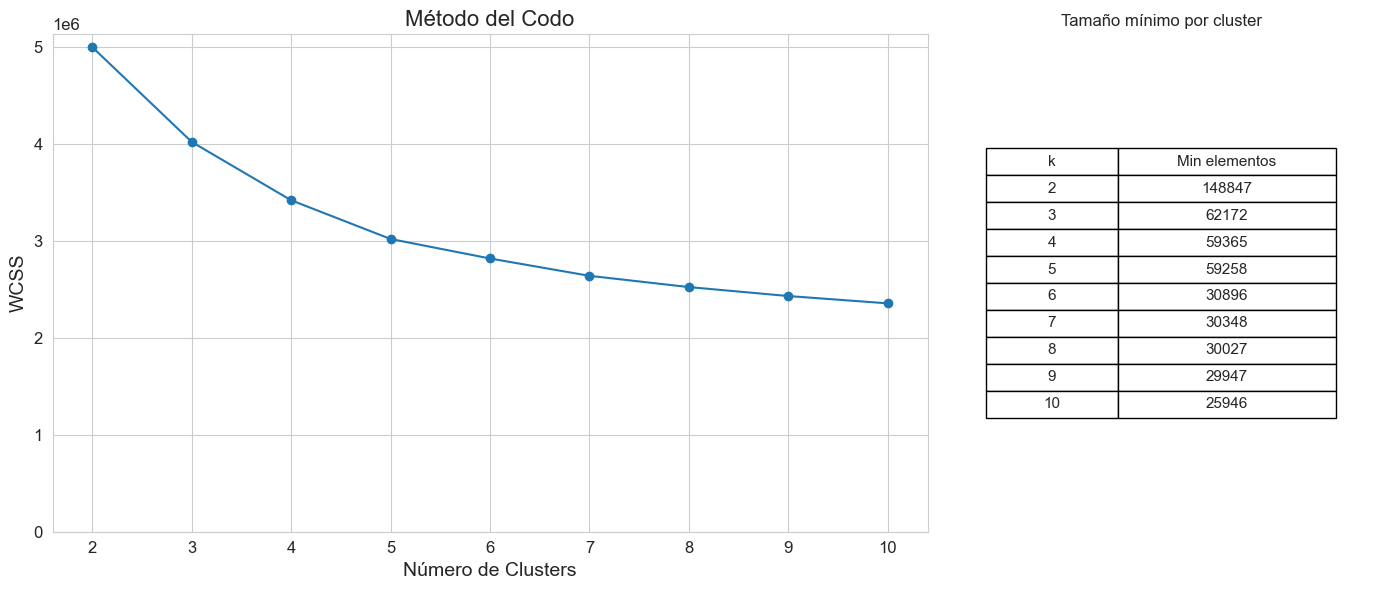

In [83]:
wcss, elem_min, sil_scores = [], [], []
n_clusters = 10
rango = range(2,n_clusters+1)
if Flag:
    for i in rango:
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 42)
        kmeans.fit(ordenes_df_cluster_scaled)
        wcss.append(kmeans.inertia_)
        elem_min.append(pd.DataFrame(data=kmeans.labels_).value_counts().min())

    wcss_df = pd.DataFrame(wcss)
    wcss_df.to_csv('kmeans_wcss_df.csv',index=False)
    elem_min_df = pd.DataFrame(elem_min, columns=['elem_min'], index=range(2, n_clusters+1))
    elem_min_df.to_csv('kmeans_elem_min.csv', index=False)
else:
    wcss = pd.read_csv('kmeans_wcss_df.csv')
    elem_min = pd.read_csv('kmeans_elem_min.csv')

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Gráfico del codo
ax0 = plt.subplot(gs[0])
ax0.plot(rango, wcss, marker='o')
ax0.set_title('Método del Codo')
ax0.set_xlabel('Número de Clusters')
ax0.set_ylabel('WCSS')
ax0.set_ylim(bottom=0)
ax0.set_xticks(list(rango))

# Tabla de cantidad mínima por cluster
ax1 = plt.subplot(gs[1])
ax1.axis('off')
table_data = [['k', 'Min elementos']] + [[i, int(elem_min_df.loc[i, 'elem_min'])] for i in rango]
table = ax1.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.3, 0.5])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(11)
ax1.set_title('Tamaño mínimo por cluster', fontsize=12)

plt.tight_layout()
plt.show()


## Silhouette Score

Se aplica el algoritmo de K-Means sobre el conjunto de datos escalado para tres valores específicos de k (5, 6 y 7). Para cada modelo, se registra el Silhouette Score, una métrica que evalúa qué tan bien se agrupan los datos sin solapamiento entre clusters. Estos valores se almacenan en una lista y se grafican para visualizar la calidad del agrupamiento en función del número de clústeres. Este enfoque permite comparar distintas segmentaciones y seleccionar la que ofrezca mejor cohesión y separación entre grupos.

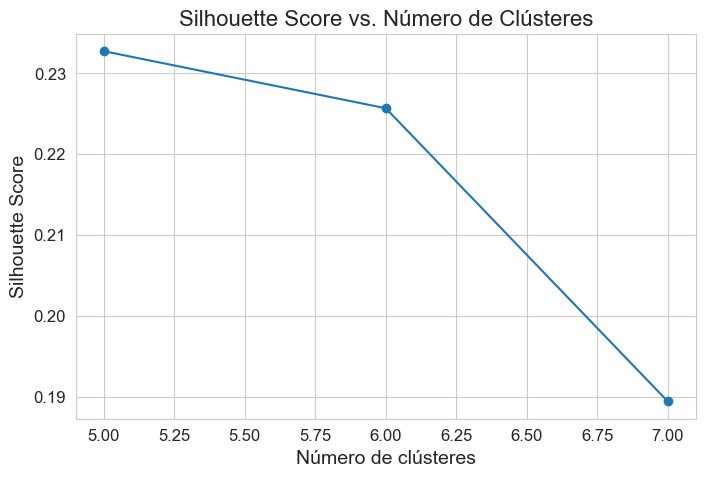

In [84]:
sil_scores = []

k_values = [5, 6, 7]

for n in k_values:    
    kmeans = KMeans(
        n_clusters=n,
        init='k-means++',
        max_iter=300,
        n_init=15,
        random_state=42
    )
    kmeans.fit(ordenes_df_cluster_scaled)
    
    sil_score = silhouette_score(
        ordenes_df_cluster_scaled,
        kmeans.labels_,
        sample_size=10_000,
        random_state=42
    )
    sil_scores.append(sil_score)
    
plt.figure(figsize=(8,5))
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score vs. Número de Clústeres')
plt.xlabel('Número de clústeres')
plt.ylabel('Silhouette Score')
plt.show()


Se aplicaron los métodos del codo y del Silhouette Score para determinar el número óptimo de clústeres en el modelo de K-Means. El gráfico del codo mostró una disminución significativa del WCSS (Within-Cluster Sum of Squares) hasta k=5, punto a partir del cual las mejoras en cohesión interna fueron marginales. Complementariamente, el Silhouette Score alcanzó su valor más alto también en k=5 (~0.233), lo que indica una buena separación entre grupos y una estructura consistente en el agrupamiento. Esta convergencia entre ambos criterios respaldó la elección técnica de cinco clústeres como solución óptima, además de facilitar la interpretación funcional y la acción comercial sobre los segmentos.

## Visualizacion 
### PCA

Se aplica el algoritmo K-Means con k = 5 sobre el dataset escalado para asignar etiquetas de cluster a cada observación, y se guarda el resultado en un archivo CSV. Luego se imprime la cantidad de elementos por cluster como diagnóstico básico de distribución. Para visualizar los agrupamientos, se aplica reducción de dimensionalidad con PCA y se proyecta cada observación en dos componentes principales, coloreando por cluster. El gráfico resultante permite inspeccionar la estructura y dispersión de los clusters generados por K-Means de forma intuitiva en 2D.

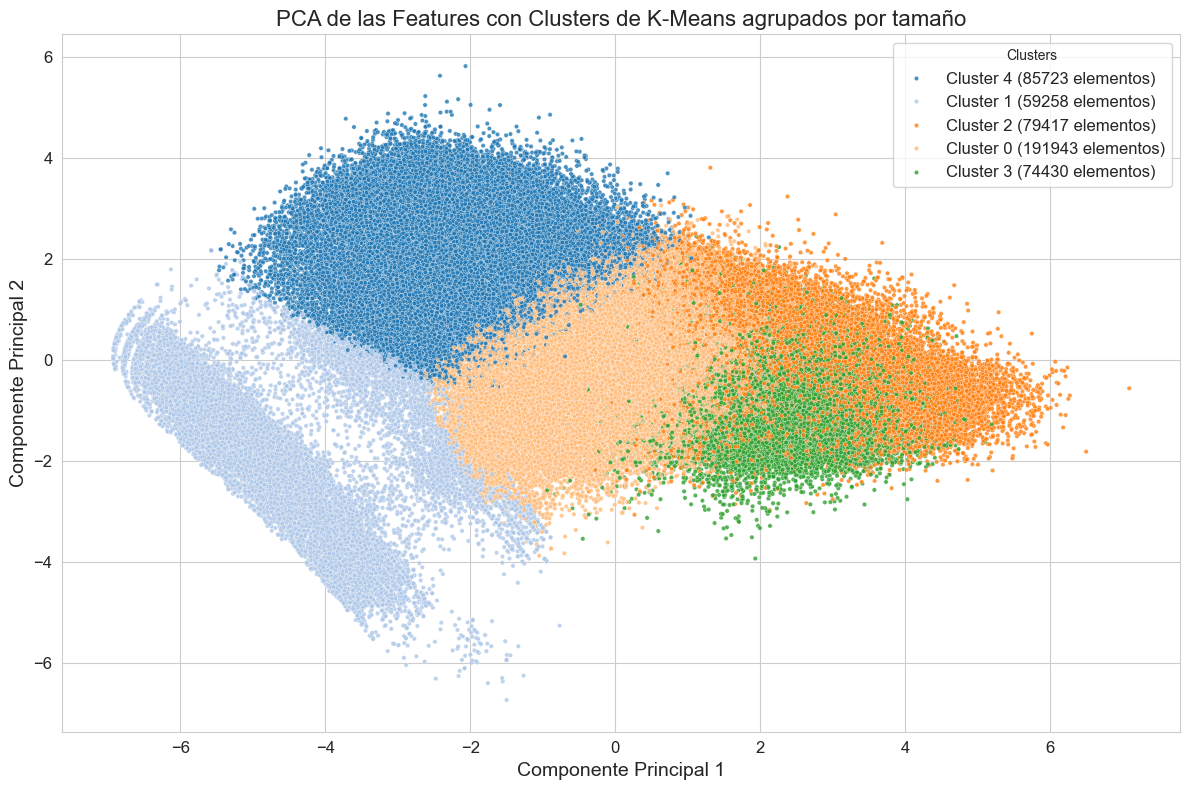

In [85]:
n_clusters = 5

if Flag:
  kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 42)
  kmeans.fit(ordenes_df_cluster_scaled)
  resultados = pd.DataFrame(data=kmeans.labels_, columns = ['N_cluster'])

  resultados.to_csv('kmeans_resultados.csv',index = False)

else:
  resultados = pd.read_csv('kmeans_resultados.csv')

if Flag:
  pca = PCA(n_components=2, random_state = 42)
  X_pca = pca.fit_transform(df_scaled_array)

  pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
  pca_df['order_id'] = ordenes_cluster['order_id'].values
  pca_df['cluster'] = resultados['N_cluster']

  pca_df.to_csv('kmeans_pca_results.csv',index=False)
else:
  pca_df = pd.read_csv('kmeans_pca_results.csv')

# Obtener cantidades por cluster
conteos = resultados['N_cluster'].value_counts().sort_index()

# Construir mapeo de etiquetas con orden y "elementos"
cluster_labels = {
    i: f"Cluster {i} ({conteos[i]} elementos)"
    for i in sorted(conteos.index)
}

# Aplicar etiquetas al DataFrame de PCA
pca_df['cluster_str'] = pca_df['cluster'].map(cluster_labels)

# Graficar con etiquetas enriquecidas
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster_str',
    palette='tab20',
    s=10,
    alpha=0.8
)

plt.title('PCA de las Features con Clusters de K-Means agrupados por tamaño')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title="Clusters")
plt.tight_layout()
plt.show()

### TSNE

Se aplica t-SNE sobre una muestra aleatoria del 10% del dataset escalado con el fin de proyectar datos multidimensionales en dos dimensiones, manteniendo la estructura local de los grupos. Se definen hiperparámetros clave como perplexity, learning_rate y angle para optimizar tanto la representación como la eficiencia computacional. El resultado es una matriz con coordenadas 2D que puede ser usada para visualizar los clusters generados previamente, ofreciendo una perspectiva complementaria a la proyección PCA.

In [86]:
X_scaled = pd.DataFrame(ordenes_df_cluster_scaled)
X_scaled_sample = X_scaled.sample(frac = .1, random_state=42).copy()

if Flag:  

    tsne = TSNE(
        n_components=2,
        perplexity=50,             # 5–50; según regla práctica p ≈ min(50, n_samples/1000)
        learning_rate=4000,        # ≈ n_samples/12 → 50000/12 ≈ 4167
        max_iter=1000,             # mínimo 1000; 2000–3000 para más detalle
        early_exaggeration=12.0,   # valor por defecto; puedes probar 8–20
        init='pca',                # en lugar de random, para estabilizar la solución
        method='barnes_hut',       # usa el algoritmo de Barnes-Hut (≈ O(n log n))
        angle=0.8,                 # trade-off precisión/velocidad; 0.2 ≈ más preciso, 0.8 ≈ más rápido
        random_state=42,
    )

    tsne_result = tsne.fit_transform(X_scaled_sample)

    tsne_result_df = pd.DataFrame(data=tsne_result,index=X_scaled_sample.index)

    tsne_result_df.to_csv('kmeans_tsne_results.csv',index=False)

else:
    tsne_result = pd.read_csv('kmeans_tsne_results.csv')
    tsne_result_df = tsne_result.copy()
    tsne_result_df.index = X_scaled_sample.index
    

In [87]:
tsne_result_df = tsne_result_df.join(pca_df,how='left')

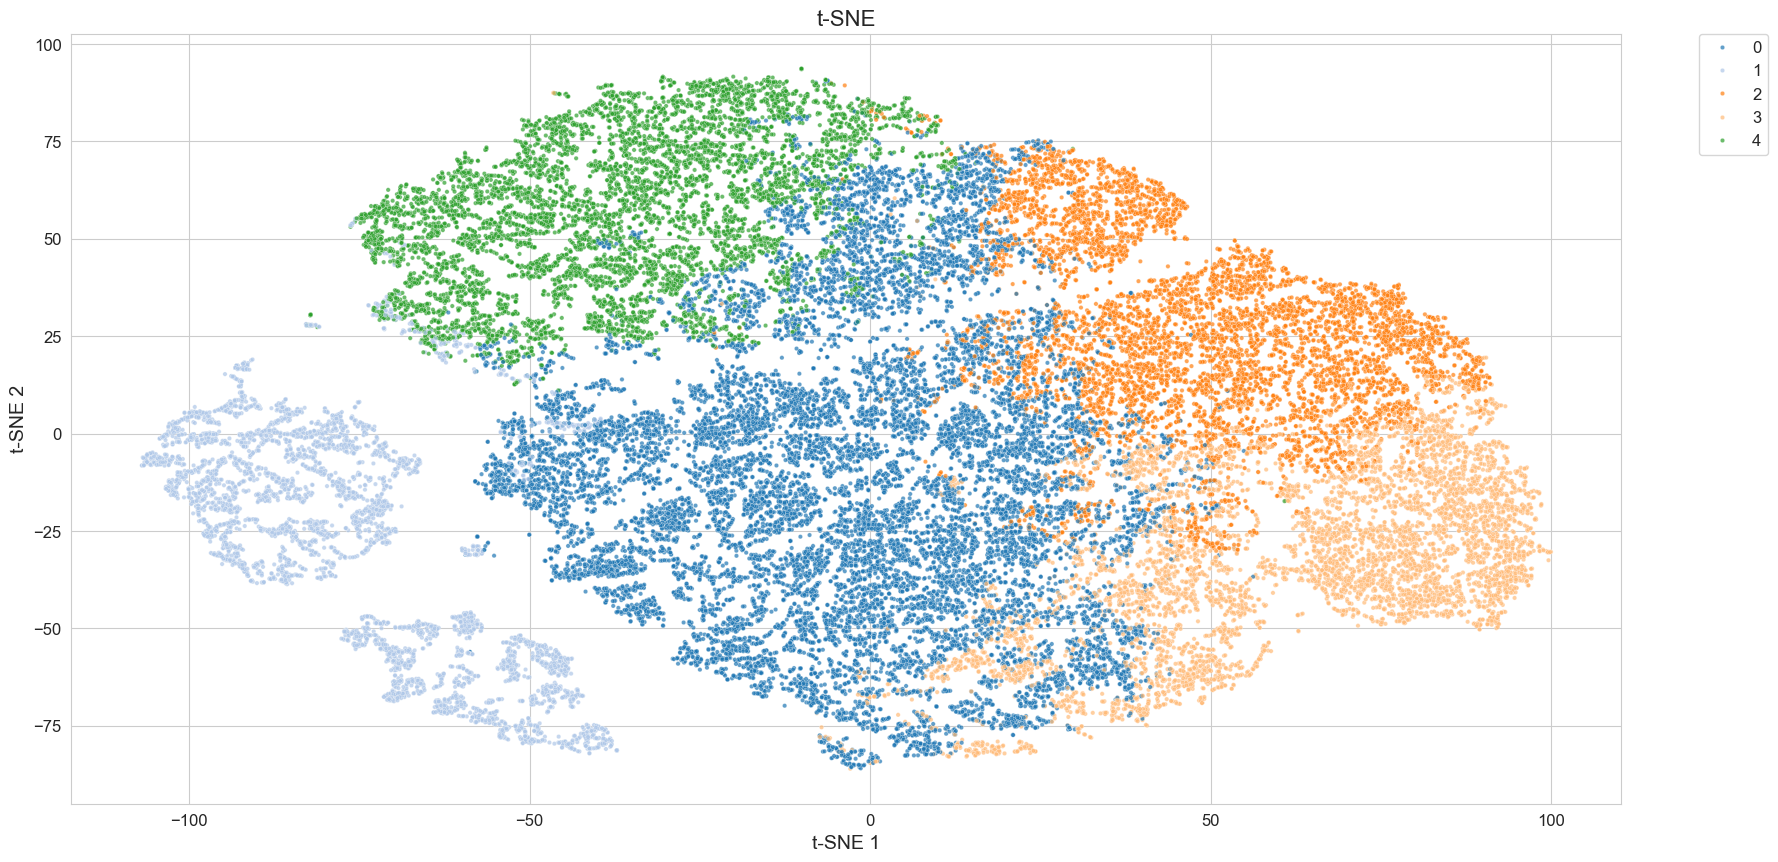

In [88]:
# Gráfica t-SNE
plt.figure(figsize=(20, 10))
sns.scatterplot(x = tsne_result_df.iloc[:,0],
                y = tsne_result_df.iloc[:,1],
                hue = tsne_result_df['cluster'],
                palette = 'tab20' ,
                alpha = 0.7,
                s=10)

plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [89]:
ordenes_df_cluster = ordenes_cluster.merge(pca_df,on='order_id')
ordenes_df_cluster.columns

Index(['order_id', 'weekday', 'hour', 'vendor_id', 'user_id', 'total_amount',
       'has_discount', 'cant_prod_por_ped', 'cant_ordenes_vendor',
       'cat1_por_vendor', 'cat2_por_vendor', 'mean_euc_dist', 'max_euc_dist',
       'min_euc_dist', 'mean_frec_global', 'std_frec_global', 'cant_ord_user',
       'identical_order_count', 'precio_prom_prod', 'log_precio_prom_prod',
       'cant_level_one_unicos', 'aux_has_discount', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'fin_de_semana_mañana',
       'fin_de_semana_mediodia', 'fin_de_semana_noche', 'fin_de_semana_tarde',
       'semana_mañana', 'semana_mediodia', 'semana_noche', 'semana_tarde',
       'week_sin', 'week_cos', 'log_sum_pairwise_cooc', 'PC1', 'PC2',
       'cluster', 'cluster_str'],
      dtype='object')

In [90]:
vars_a_excluir = ['order_id', 'weekday', 'hour','user_id','vendor_id','weekday','has_discount','hour','cant_ord_user','precio_prom_prod','identical_order_count','aux_has_discount']

## Caracterizacion de los clusters

Se estandarizan las variables numéricas excluyendo componentes de reducción (PCA, t-SNE) y etiquetas de cluster, con el fin de calcular estadísticas descriptivas centradas en cada grupo. Se identifican, para cada cluster, las variables que más se alejan de la media global en valor absoluto, permitiendo caracterizar los grupos con base en sus atributos más distintivos. La caracterización se completa mostrando la cantidad de elementos por cluster y un resumen de medias comparativas por cada variable top, lo cual aporta interpretabilidad al resultado del clustering.

In [91]:
vars_a_excluir.extend(['PC1','PC2','cluster','cluster_str'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(ordenes_df_cluster.drop(columns = vars_a_excluir))  
df_scaled = pd.DataFrame(X_scaled, columns=ordenes_df_cluster.drop(columns = vars_a_excluir).columns)

df_scaled['cluster'] = ordenes_df_cluster['cluster']

# Calcular medias
media_global = df_scaled.drop(columns='cluster').mean()
medias = df_scaled.groupby('cluster').mean()

# Diferencia absolutas (o relativas)
diff = (medias - media_global).abs()

# Definimos la cantidad de variables top para caracterizar

N = 6
top_vars_z = {
    cl: diff.loc[cl]
               .sort_values(ascending=False)
               .head(N)
               .index
               .tolist()
    for cl in diff.index
}

vars_orig = ordenes_df_cluster.drop(columns=vars_a_excluir).columns
medias_global_orig = ordenes_df_cluster[vars_orig].mean()
medias_orig = ordenes_df_cluster.groupby('cluster')[vars_orig].mean()
diff_orig = (medias_orig - medias_global_orig).abs()

tot_elem = ordenes_df_cluster.shape[0]

for cl, vars_list in top_vars_z.items():
    n_elem = ordenes_df_cluster[ordenes_df_cluster['cluster'] == cl].shape[0]
    porc_elem = round(n_elem/tot_elem,2)

    print(f"\nCluster {cl}, ", f'{n_elem} elementos ({porc_elem} del total)')

    df_tops = pd.DataFrame({
        'media_cluster' : medias_orig.loc[cl, vars_list],
        'media_global' : medias_global_orig[vars_list],
        'dif_global': diff_orig.loc[cl,vars_list]
    })


Cluster 0,  191943 elementos (0.39 del total)

Cluster 1,  59258 elementos (0.12 del total)

Cluster 2,  79417 elementos (0.16 del total)

Cluster 3,  74430 elementos (0.15 del total)

Cluster 4,  85723 elementos (0.17 del total)


Se genera una grilla de subplots adaptativa para representar, por cluster, las variables más distintivas respecto a la media global. Para cada cluster, se construyen gráficos de barras donde se muestra la media de cada variable relevante en cada grupo, junto con una línea de referencia que indica la media global. Se agrega el valor numérico sobre cada barra para facilitar la interpretación. Esta visualización facilita comparar visualmente qué características definen a cada grupo y qué tan diferenciadas están del comportamiento promedio en el conjunto de datos.

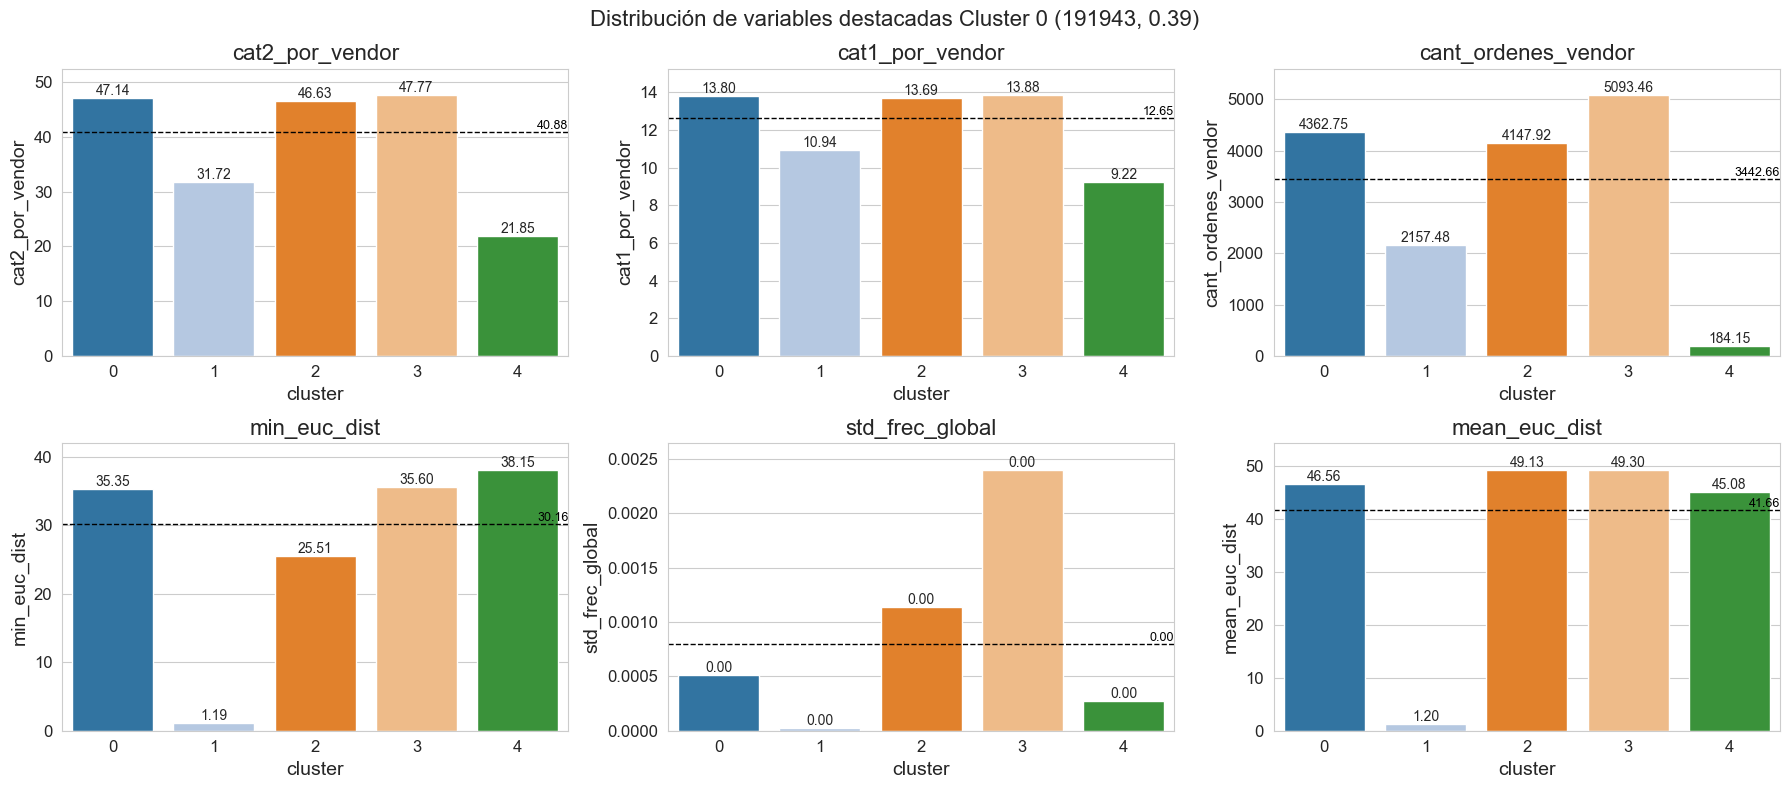

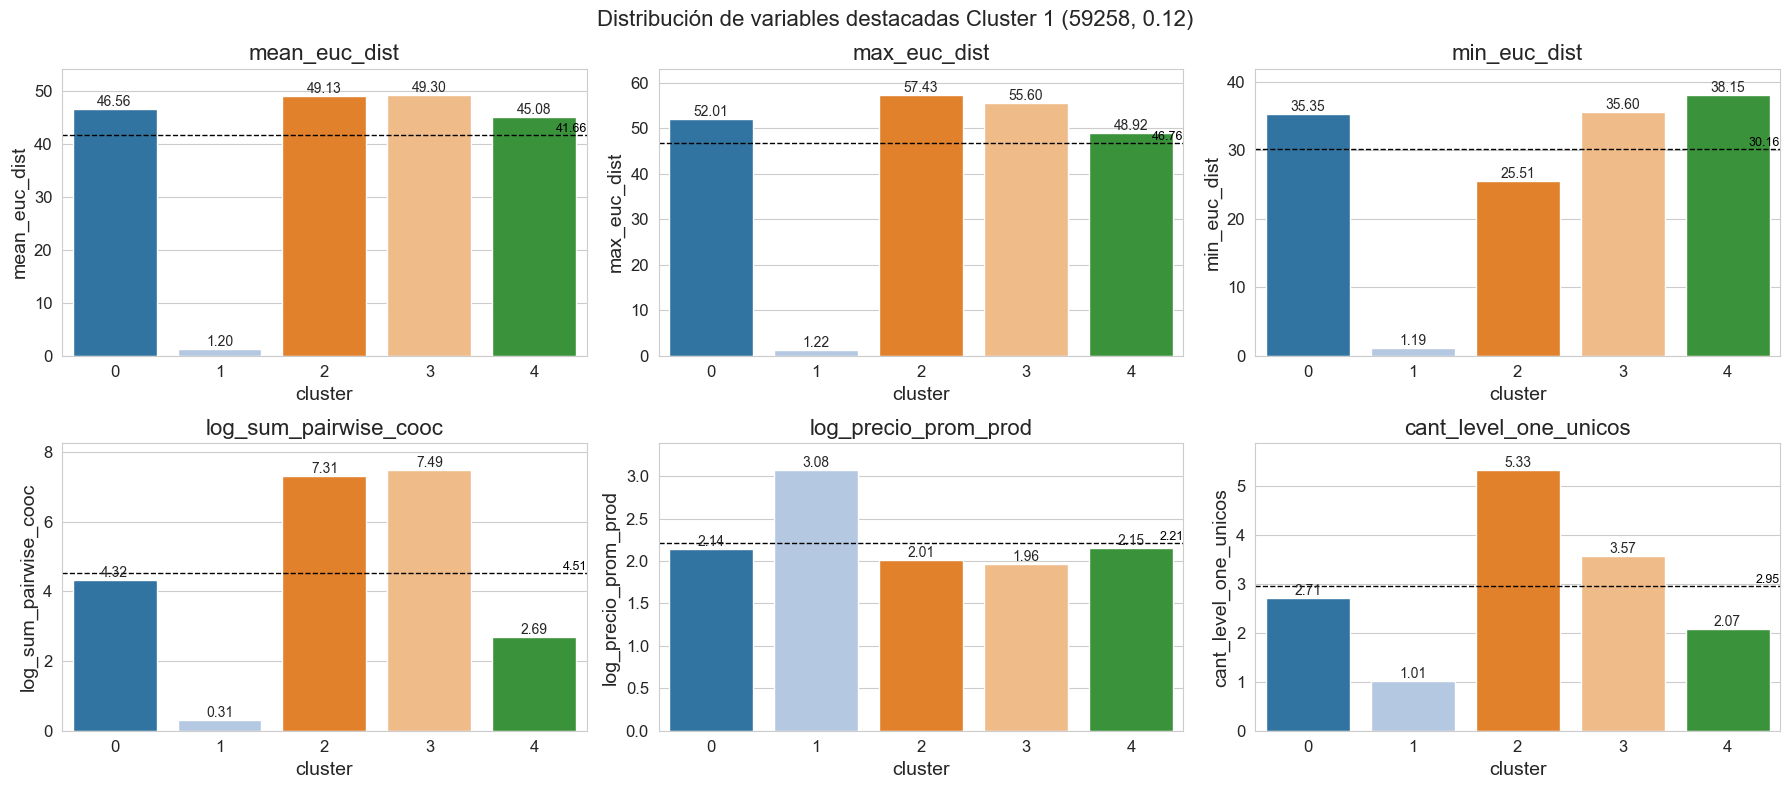

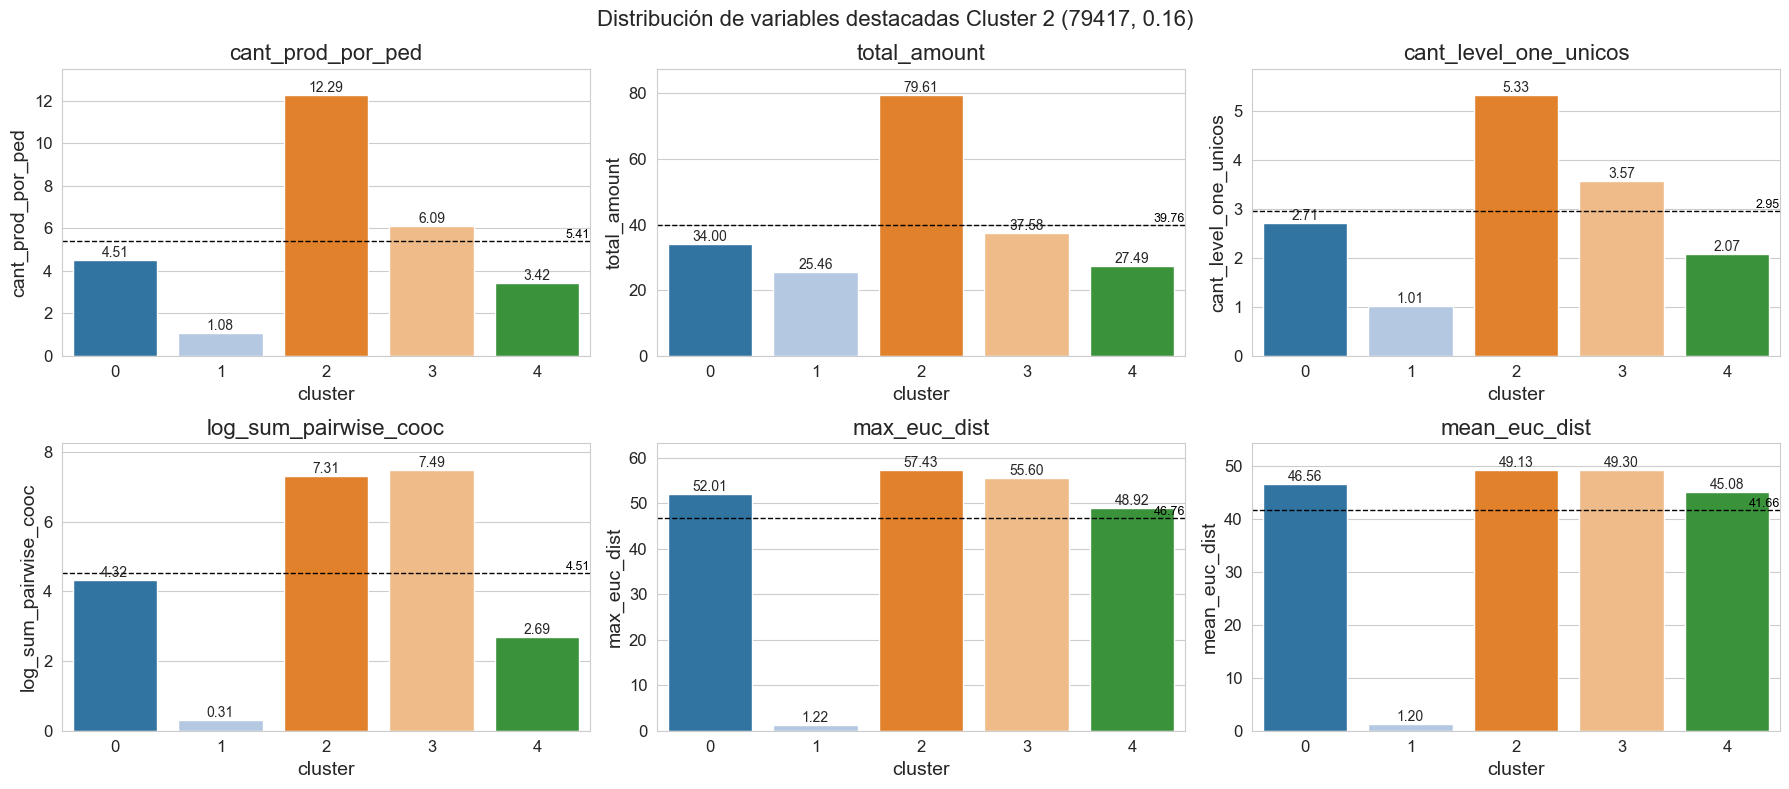

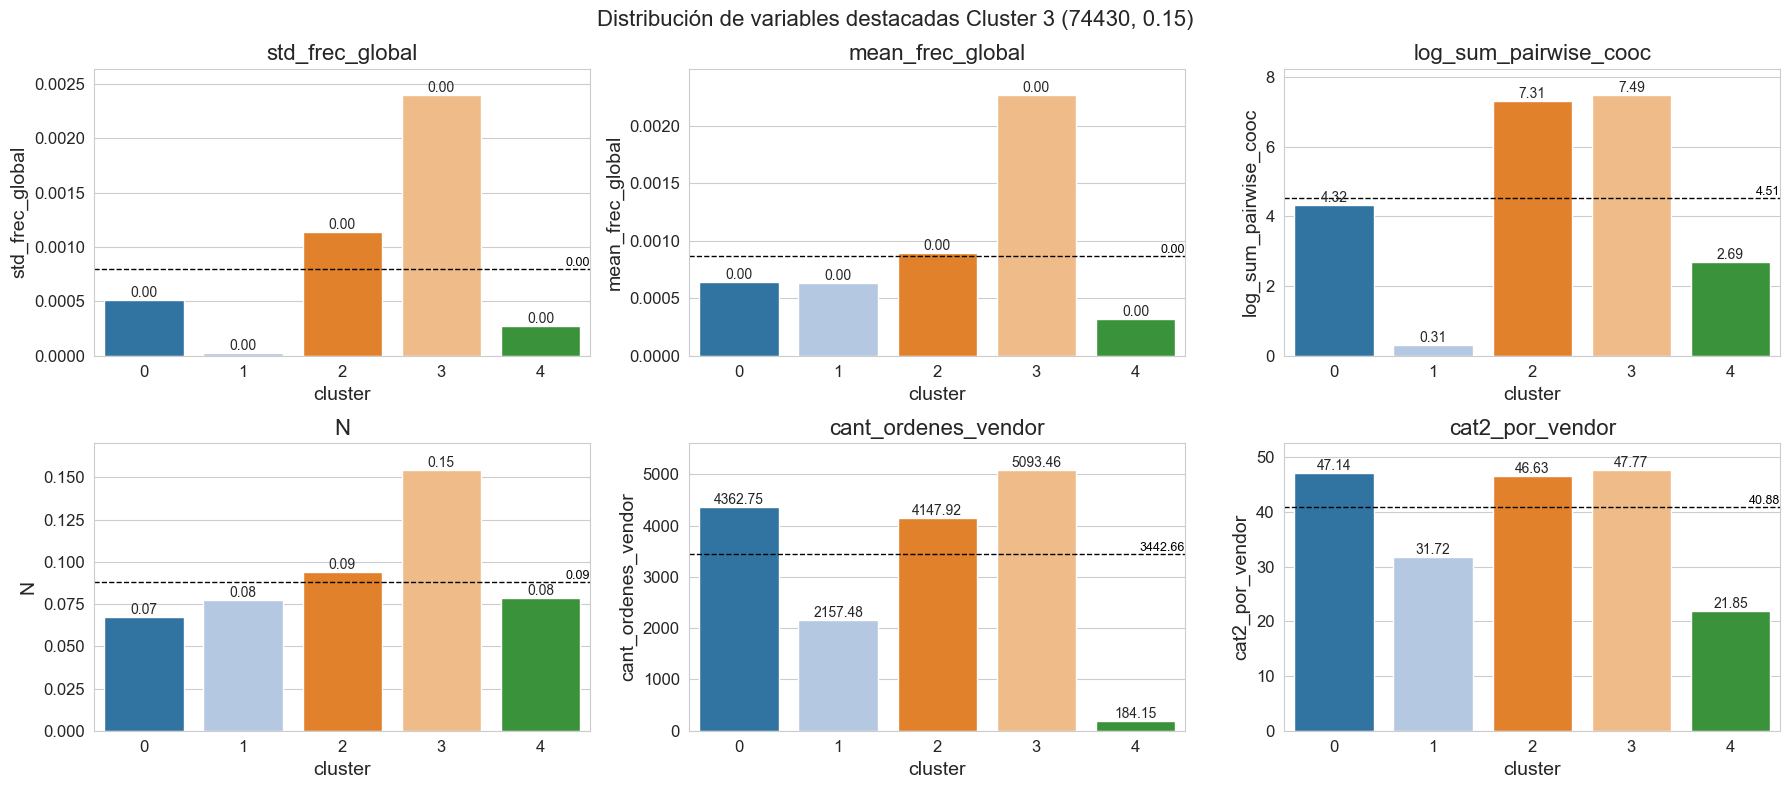

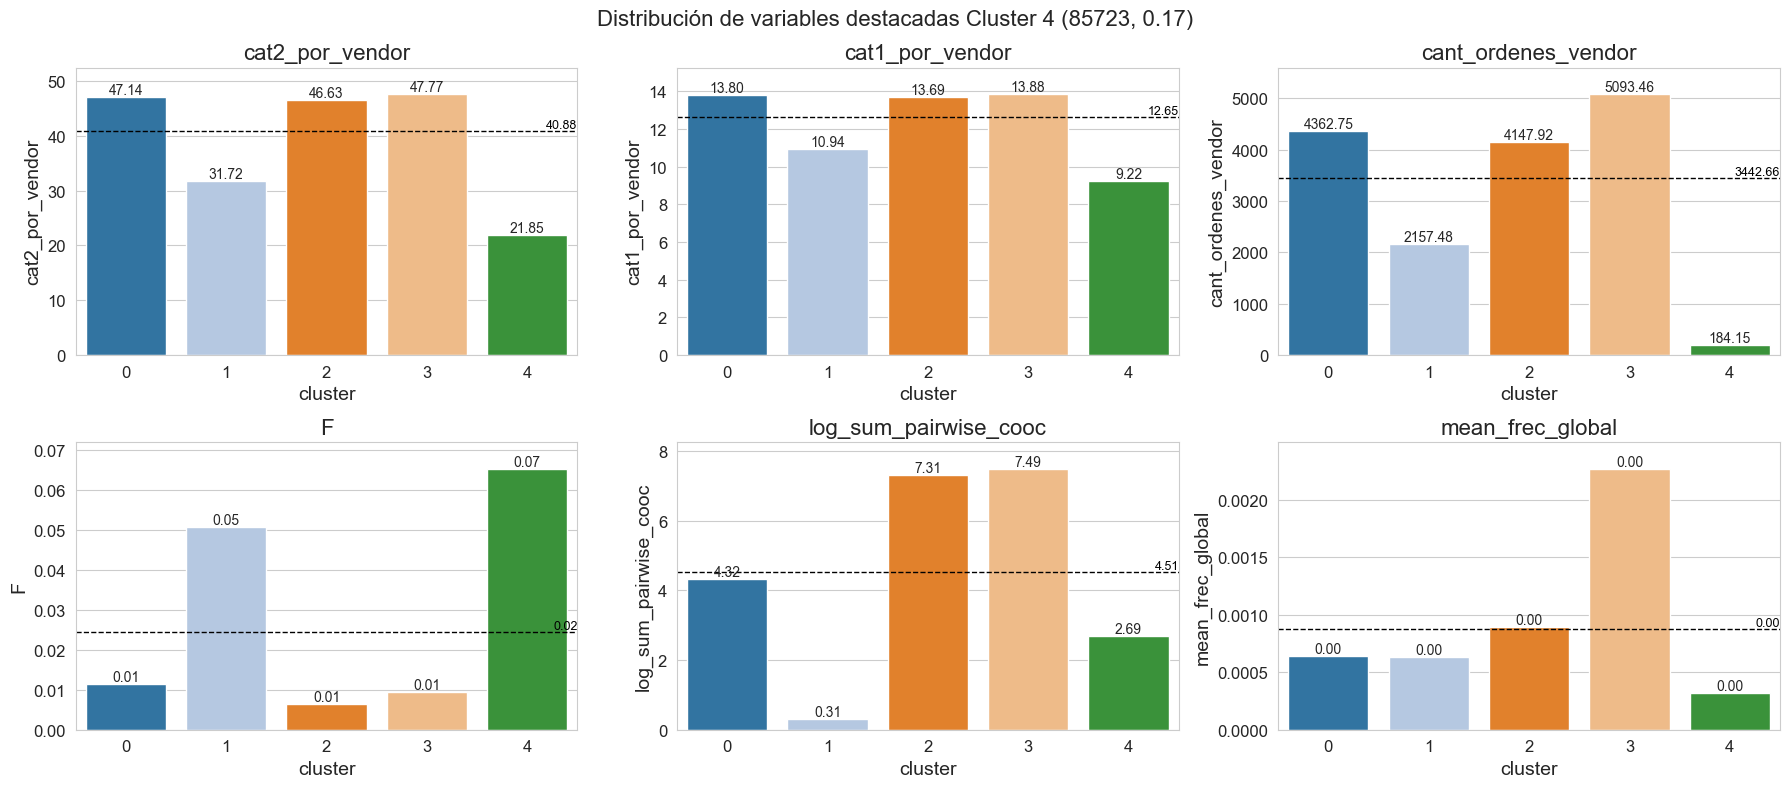

In [92]:
def calcular_grid(n_graficos):
    ncols = math.ceil(math.sqrt(n_graficos))
    nrows = math.ceil(n_graficos / ncols)
    return nrows, ncols

ncols = 3
nrows = math.ceil(N / ncols)

for cl, vars_list in top_vars_z.items():

    n_elem = ordenes_df_cluster[ordenes_df_cluster['cluster'] == cl].shape[0]
    porc_elem = round(n_elem/tot_elem,2)
    
    fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols,
    sharex=False, sharey=False,
    figsize = (ncols*6,nrows*4)
    )
    axes = axes.flatten()
    for idx, var in enumerate(vars_list):
        ax = axes[idx]
        serie = medias_orig[var]

        sns.barplot(x=serie.index, y=serie.values, hue=serie.index, palette='tab20', legend=False, ax=ax)
        ax.set_title(f"{var}")
        ax.set_xlabel("cluster")
        ax.set_ylabel(var)
        ax.set_ylim(top=serie.max()*1.1)
        ax.axhline(y=medias_global_orig[var], color='black', linestyle='--', linewidth=1)
        ax.text(x=ax.get_xlim()[1],y=medias_global_orig[var],s=f'{medias_global_orig[var]:.2f}',
                va='bottom',ha='right',color = 'black',fontsize = 9)

        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                ax.text(
                    bar.get_x() + bar.get_width()/2,
                    height,
                    f'{height:.2f}',
                    ha='center',
                    va='bottom'
                )

    plt.suptitle(f"Distribución de variables destacadas Cluster {cl} ({n_elem}, {porc_elem})", fontsize=16)
    plt.tight_layout()
    plt.show()

Se define una función que permite graficar, de forma sistemática y adaptable, la distribución de variables destacadas entre los distintos clusters. Se genera una grilla de subplots que acomoda cada variable en un gráfico de barras individual, donde se comparan las medias por cluster y se incluye como referencia la media global con una línea horizontal punteada. Se anotan los valores numéricos sobre cada barra para facilitar la lectura. Esta función resulta útil para explorar las diferencias entre grupos a nivel de variables individuales, manteniendo consistencia visual y escalabilidad.

In [93]:
def bar_plots_N_var(vars_list):
    """
    Genera una grilla de gráficos de barras que compara las medias por cluster
    para un conjunto de variables numéricas. Incluye línea de referencia con media global
    y etiquetas numéricas sobre cada barra.

    Parámetros:
    -----------
    vars_list : list of str
        Lista de nombres de variables a graficar.

    Dependencias:
    -------------
    - medias_orig: medias por cluster (DataFrame)
    - medias_global_orig: medias globales (Series)
    """

    N = len(vars_list)
    ncols = 3
    nrows = math.ceil(N / ncols)

    # Se crea el canvas con subplots distribuidos en grilla dinámica
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        sharex=False, sharey=False,
        figsize=(ncols*6, nrows*4)
    )
    axes = axes.flatten()  # Se convierte en vector para iterar con índices

    for idx, var in enumerate(vars_list):
        ax = axes[idx]
        serie = medias_orig[var]  # Medias por cluster para la variable actual

        # Gráfico de barras con Seaborn
        sns.barplot(
            x=serie.index,
            y=serie.values,
            hue=serie.index,
            palette='tab20',
            legend=False,
            ax=ax
        )

        # Ajustes estéticos del gráfico individual
        ax.set_title(f"{var}")
        ax.set_xlabel("cluster")
        ax.set_ylabel(var)
        ax.set_ylim(top=serie.max() * 1.1)

        # Línea de referencia con la media global
        ax.axhline(
            y=medias_global_orig[var],
            color='black',
            linestyle='--',
            linewidth=1
        )

        # Valor numérico de la media global en el borde del gráfico
        ax.text(
            x=ax.get_xlim()[1],
            y=medias_global_orig[var],
            s=f'{medias_global_orig[var]:.2f}',
            va='bottom',
            ha='right',
            color='black',
            fontsize=9
        )

        # Añadir etiqueta numérica sobre cada barra
        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height,
                    f'{height:.2f}',
                    ha='center',
                    va='bottom'
                )

    # Título general y ajuste de layout
    plt.suptitle("Distribución de variables", fontsize=16)
    plt.tight_layout()
    plt.show()


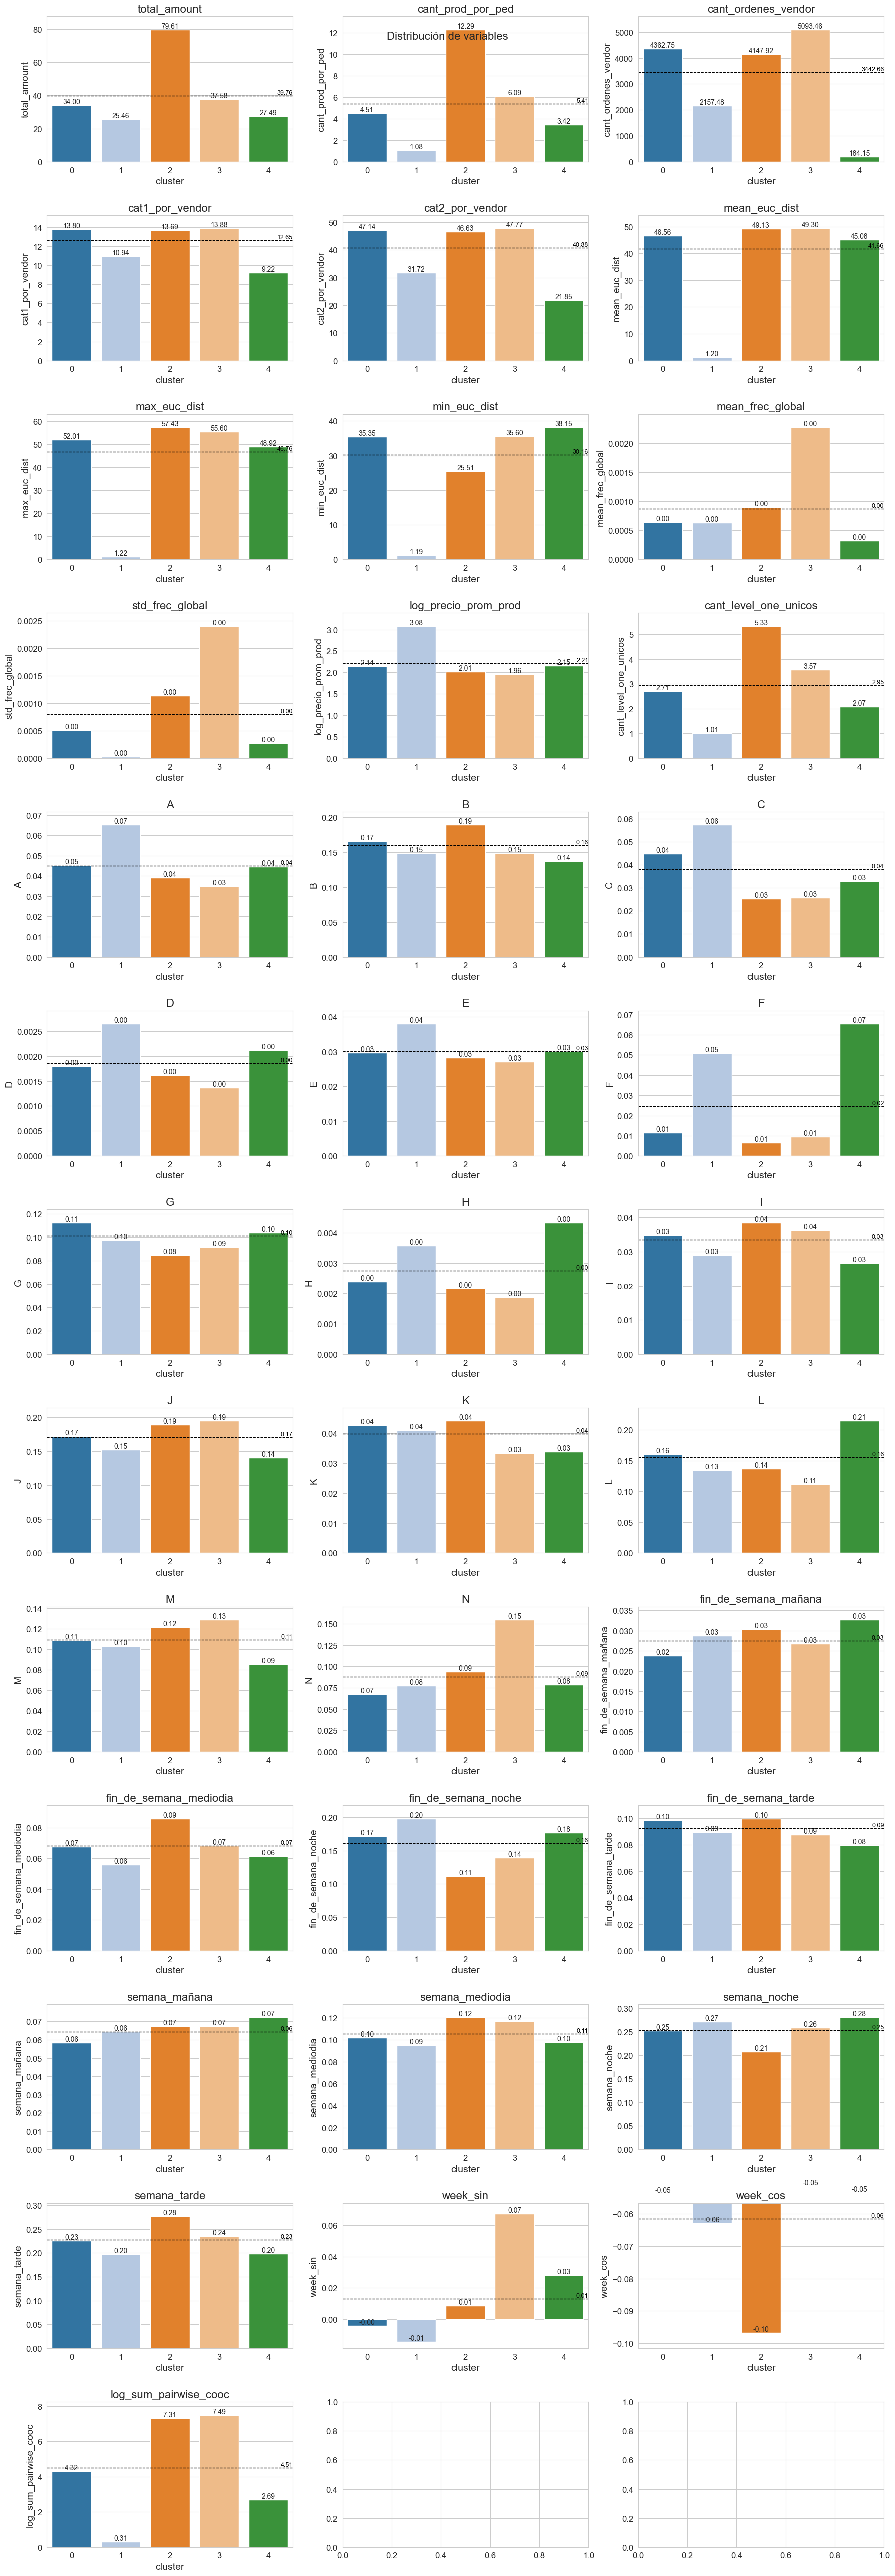

In [94]:
vars = medias_orig.columns

bar_plots_N_var(vars)

## Conclusiones

Según el análisis con K-Means (k=5) sobre las órdenes de compra en la vertical de supermercados de PedidosYa, se identificaron cinco clusters con perfiles claramente diferenciados:

- **Cluster 0 – Compras planificadas y rutinarias (39.1%)** Representa el grupo más masivo. Las órdenes tienen tamaño medio, con carritos diversos y equilibrados en variedad y precio. Son frecuentes en franjas de tarde y noche entre semana, suelen incluir descuentos y muestran una moderada complejidad en la combinación de productos.

- **Cluster 1 – Compras específicas e impulsivas (12.1%)** Órdenes muy pequeñas, centradas en un único producto, típicamente premium. Exhiben baja diversidad y co-ocurrencia, sin uso de descuentos, y se concentran principalmente en horarios nocturnos o de fin de semana. Reflejan decisiones de compra puntuales, de reposición o urgencia.

- **Cluster 2 – Compras de alto volumen y complejidad (16.2%)** Carritos grandes con muchos productos únicos, alto importe total y elevada co-ocurrencia. Se observan especialmente en fines de semana y picos horarios. Este grupo puede incluir perfiles operativos o institucionales con demandas logísticas exigentes.

- **Cluster 3 – Compras mixtas y oportunistas (15.2%)** Pedidos de volumen moderado con una combinación de productos populares y especiales. Alta diversidad de proveedores, frecuente uso de descuentos, y comportamiento flexible en cuanto a momento de compra. Resulta clave para estrategias de cross-selling y fidelización.

- **Cluster 4 – Compras exploratorias y especializadas (17.5%)** Órdenes pequeñas orientadas a categorías concretas, con baja complejidad logística. Se alternan entre semana y fin de semana, y reflejan comportamientos de prueba o selección deliberada. Este segmento puede ser sensible a la personalización y sugerencias dirigidas.

Cada uno de estos clusters revela patrones diferenciados de consumo y abre oportunidades para estrategias comerciales más enfocadas